<a href="https://colab.research.google.com/github/aryaanjalii203/Facial-Emotion-Detection/blob/main/facial_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Extraction

In [ ]:
import zipfile
import os

zip_file_path = '/content/archive.zip'
extract_folder_path = '/content/fer2013/'

os.makedirs(extract_folder_path, exist_ok=True)

try:
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)
  print("Extraction successful.")
except zipfile.BadZipFile:
  print("The file is not a valid ZIP file.")






Extraction successful.


Directory Traversal and File Listing.

In [ ]:
import os

def list_files(directory):
    for root, dirs, files in os.walk(directory):
      print("Current Directory:", root)
      print("Subdirectories:", dirs)
      print("Files:", files)
      print()  # For readability

# List files in test and train directories
list_files('/content/fer2013/test')
list_files('/content/fer2013/train')


Current Directory: /content/fer2013/test
Subdirectories: ['neutral', 'sad', 'happy', 'fear', 'angry', 'disgust', 'surprise']
Files: []

Current Directory: /content/fer2013/test/neutral
Subdirectories: []
Files: ['PrivateTest_5309902.jpg', 'PrivateTest_60521672.jpg', 'PublicTest_88733920.jpg', 'PrivateTest_31668661.jpg', 'PrivateTest_63052896.jpg', 'PrivateTest_6251453.jpg', 'PrivateTest_73643339.jpg', 'PrivateTest_30944892.jpg', 'PublicTest_55659919.jpg', 'PublicTest_37199908.jpg', 'PrivateTest_50443275.jpg', 'PrivateTest_54961068.jpg', 'PublicTest_21141989.jpg', 'PublicTest_96155978.jpg', 'PublicTest_49010808.jpg', 'PublicTest_29091719.jpg', 'PublicTest_53746155.jpg', 'PrivateTest_50833752.jpg', 'PrivateTest_93606620.jpg', 'PublicTest_4051764.jpg', 'PublicTest_33942757.jpg', 'PublicTest_10594126.jpg', 'PrivateTest_52765860.jpg', 'PublicTest_28861626.jpg', 'PrivateTest_72304056.jpg', 'PrivateTest_99230172.jpg', 'PrivateTest_41271272.jpg', 'PublicTest_41748290.jpg', 'PrivateTest_8129377

Image Display.

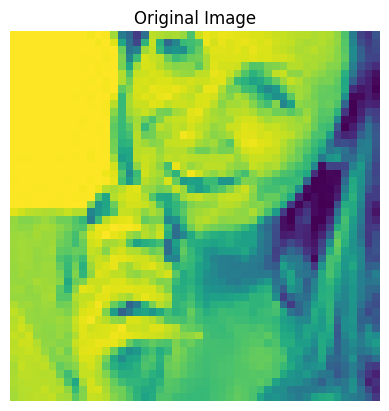

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image(image_path):
  image = Image.open(image_path)

  plt.imshow(image)
  plt.title('Original Image')
  plt.axis('off')
  plt.show()

                        # Example usage
image_path = '/content/fer2013/test/happy/PrivateTest_99871365.jpg'
display_image(image_path)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


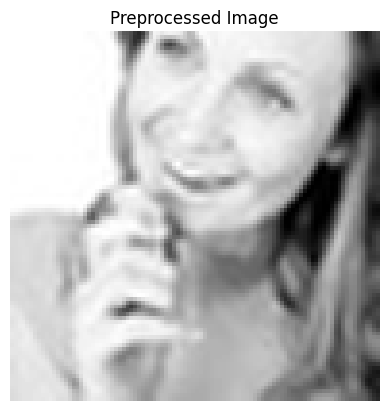

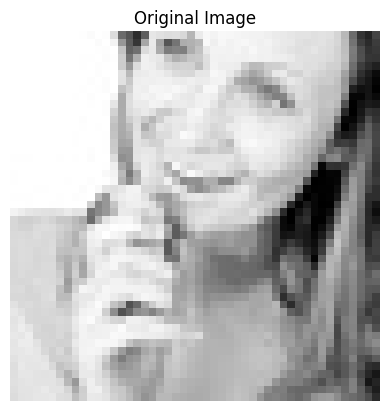

In [ ]:

# Define the target size
target_size = (96, 96)  # Example size

def preprocess_image(image_path, target_size):
  image = Image.open(image_path).convert('L')
  image = image.resize(target_size, Image.LANCZOS)  # Use LANCZOS resampling for better quality
  plt.imshow(image, cmap='gray')
  plt.title('Preprocessed Image')
  plt.axis('off')
  plt.show()

def display_original_image(image_path):
  image = Image.open(image_path).convert('L')
  plt.imshow(image, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')
  plt.show()

                            # Example usage
image_path = '/content/fer2013/test/happy/PrivateTest_99871365.jpg'
preprocess_image(image_path, target_size)
display_original_image(image_path)


Display Emotion Images

<Figure size 640x480 with 0 Axes>

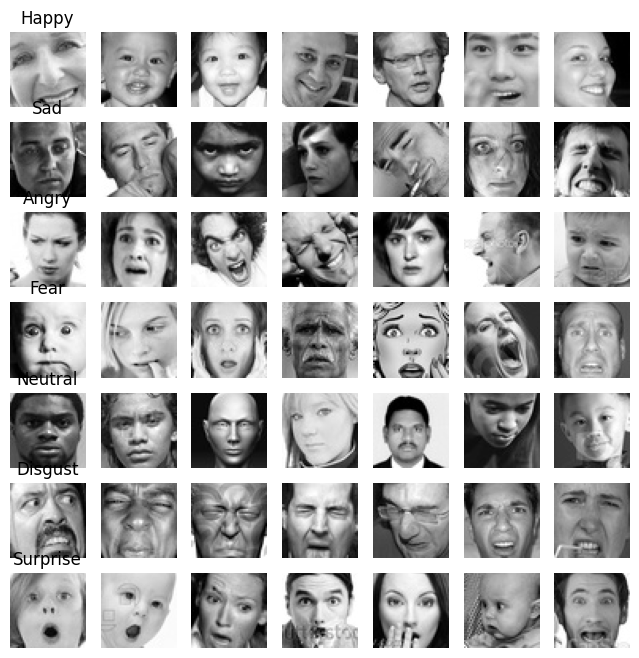

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def display_images_in_grid(directory_path, emotions, images_per_row=7):
    fig, axs = plt.subplots(len(emotions), images_per_row, figsize=(8,8))
    for row, emotion in enumerate(emotions):
      emotion_folder = os.path.join(directory_path, emotion)
      image_files = os.listdir(emotion_folder)
      for col in range(images_per_row):
        if col < len(image_files):
          image_path = os.path.join(emotion_folder, image_files[col])
          img = mpimg.imread(image_path)
          axs[row, col].imshow(img, cmap='gray')
          axs[row, col].axis('off')
        else:
          axs[row, col].axis('off')  # Hide empty subplots
      axs[row, 0].set_title(emotion.capitalize(), fontsize=12)

plt.tight_layout()
plt.show()

# Directory path to the test set
test_directory_path = '/content/fer2013/test'

# List of emotions
emotions = ['happy', 'sad', 'angry', 'fear', 'neutral', 'disgust', 'surprise']

# Display images
display_images_in_grid(test_directory_path, emotions)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
target_size = (48, 48)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
        shear_range=0.2,
            zoom_range=0.2,
                horizontal_flip=True
                )

test_datagen = ImageDataGenerator(
                    rescale=1./255
                    )

train_generator = train_datagen.flow_from_directory(
                        '/content/fer2013/train',
                            target_size=target_size,
                                batch_size=batch_size,
                                    class_mode='categorical'
                                    )

validation_generator = test_datagen.flow_from_directory(
                                        '/content/fer2013/test',
                                            target_size=target_size,
                                                batch_size=batch_size,
                                                    class_mode='categorical'
                                                    )

Found 28713 images belonging to 7 classes.
Found 7182 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
        MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
                MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(128, (3, 3), activation='relu'),
                        MaxPooling2D(pool_size=(2, 2)),
                            Flatten(),
                                Dense(128, activation='relu'),
                                    Dropout(0.5),
                                        Dense(7, activation='softmax')
                                        ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
      train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
              epochs=10,
                  validation_data=validation_generator,
                      validation_steps=validation_generator.samples // batch_size
                      )


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 147s 161ms/step - accuracy: 0.2452 - loss: 1.8197 - val_accuracy: 0.3340 - val_loss: 1.6434
Epoch 2/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 91us/step - accuracy: 0.3438 - loss: 1.5941 - val_accuracy: 0.2857 - val_loss: 1.7142
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 202s 161ms/step - accuracy: 0.3496 - loss: 1.6389 - val_accuracy: 0.4372 - val_loss: 1.4583
Epoch 4/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.3125 - loss: 1.4984 - val_accuracy: 0.4286 - val_loss: 1.5500
Epoch 5/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 199s 159ms/step - accuracy: 0.4306 - loss: 1.4822 - val_accuracy: 0.4883 - val_loss: 1.3442
Epoch 6/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.5312 - loss: 1.3611 - val_accuracy: 0.4286 - val_loss: 1.3058
Epoch 7/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 205s 162ms/step - accuracy: 0.4553 - loss: 1.4210 - val_accuracy: 0.4934 - val_loss: 1.3145
Epoch 8/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.4062 - loss: 1.4620 - val_accuracy: 0.7143 - val_loss: 1.2043
Epoch 9/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 141s 157ms/step - accuracy: 0.4770 - loss: 1.3778 - val_accuracy: 0.5144 - val_loss: 1.2572
Epoch 10/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 42us/step - accuracy: 0.5000 - loss: 1.2300 - val_a

In [ ]:
model.save('/content/emotion_recognition_model.h5')


In [ ]:
model = tf.keras.models.load_model('/content/emotion_recognition_model.h5')


Load the trained model

In [ ]:
import tensorflow as tf


model_path = '/content/emotion_recognition_model.h5'


try:
  model = tf.keras.models.load_model(model_path)
  print("Model loaded successfully.")
except Exception as e:
  print(f"Error loading model: {e}")



Model loaded successfully.


Data Preparation for Testing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/fer2013/test'

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
        target_size=(48, 48),
            color_mode='rgb',
                class_mode='categorical',
                    shuffle=False
                    )


Found 7182 images belonging to 7 classes.


Model Evaluation for Accuracy

In [ ]:
model = tf.keras.models.load_model('/content/emotion_recognition_model.h5')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


  5/225 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.3491 - loss: 1.5580

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.4002 - loss: 1.4645
Test Accuracy: 51.64%


Confusion Matrix Plotting


225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step


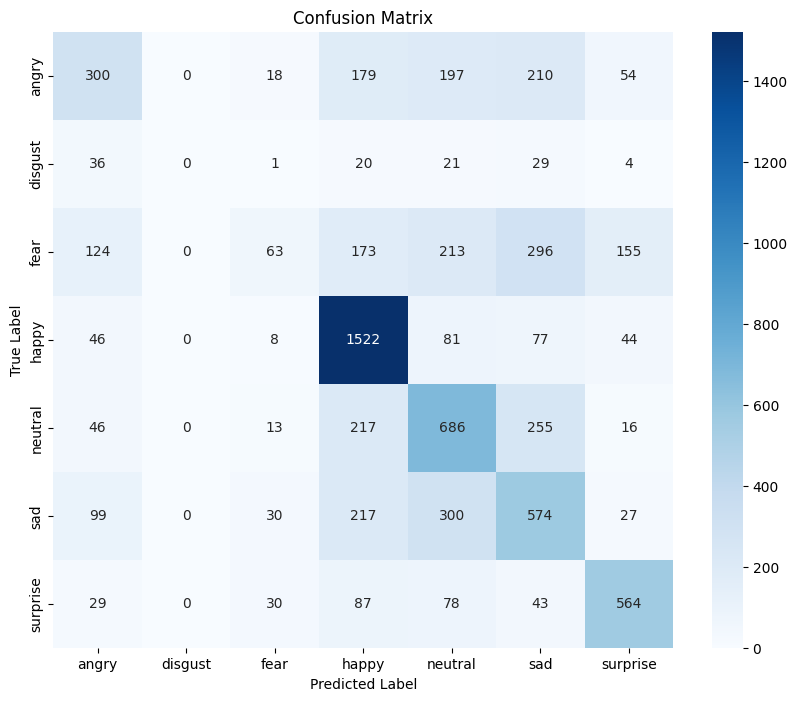

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


 Classification Report

In [ ]:
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(report)


              precision    recall  f1-score   support

       angry       0.44      0.31      0.37       958
     disgust       0.00      0.00      0.00       111
        fear       0.39      0.06      0.11      1024
       happy       0.63      0.86      0.73      1778
     neutral       0.44      0.56      0.49      1233
         sad       0.39      0.46      0.42      1247
    surprise       0.65      0.68      0.67       831

    accuracy                           0.52      7182
   macro avg       0.42      0.42      0.40      7182
weighted avg       0.49      0.52      0.48      7182



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy and Loss Graphs Plotting

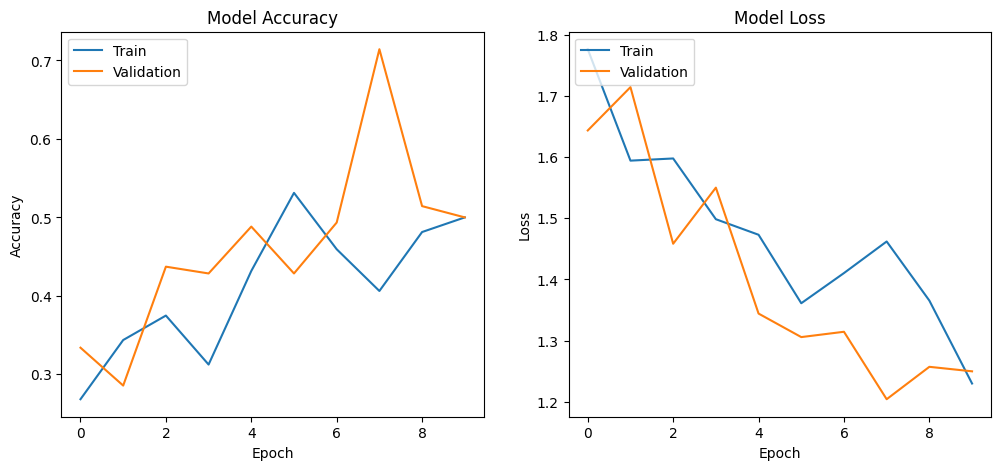

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Saving Anu.jpg to Anu (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


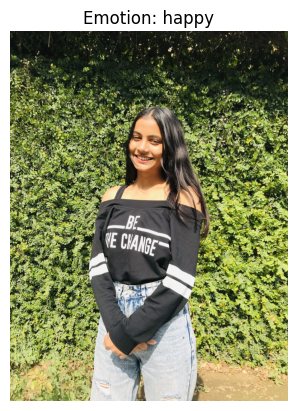

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Path to your saved model
model_path = '/content/emotion_recognition_model.h5'

# Load the trained model
model = tf.keras.models.load_model(model_path)

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def upload_and_select_image():
  uploaded = files.upload()
  if uploaded:
    file_name = list(uploaded.keys())[0]
    return file_name
  else:
    return None

def preprocess_image(image_path):
  image = Image.open(image_path).convert('RGB')  # Convert to RGB
  image = image.resize((48, 48))  # Resize to match model input
  image = np.array(image) / 255.0  # Normalize
  image = np.expand_dims(image, axis=0)  # Add batch dimension
  return image

def predict_emotion(image_path):
  image = preprocess_image(image_path)
  prediction = model.predict(image)
  predicted_class = np.argmax(prediction[0])
  predicted_emotion = emotions[predicted_class]
  return predicted_emotion

def display_selected_image_with_emotion(image_path):
  predicted_emotion = predict_emotion(image_path)
  image = Image.open(image_path)
  plt.imshow(image)
  plt.title(f'Emotion: {predicted_emotion}')
  plt.axis('off')
  plt.show()

selected_image_path = upload_and_select_image()
if selected_image_path:
  display_selected_image_with_emotion(selected_image_path)
else:
   print("No image selected.")
